In [1]:
from mp_api.client import MPRester
from emmet.core.summary import HasProps, summary_fields

API = "05pwL0aLyXiEGNsZRFhKcju39mwEqbz8"

necessary_field = ['material_id', 'formula_pretty','formula_anonymous', 'structure']
wanted_field = summary_fields['thermo']+summary_fields['dielectric']
wanted_properties = [HasProps.dielectric]

with MPRester(API) as mpr:
    docs = mpr.materials.summary.search(
        has_props = wanted_properties, fields=necessary_field+wanted_field
    )

/home/3552b737-f90f-4109-be75-4182f04db0a0/.conda/envs/materials/lib/python3.11/site-packages/mpcontribs/client/__init__.py:90: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


Retrieving SummaryDoc documents:   0%|          | 0/7290 [00:00<?, ?it/s]

In [54]:
import pandas as pd

# Converting the data raw data into dataframe
materials = []
for material in docs:
  material = dict(material)
  materials.append(material)
df = pd.DataFrame(materials)
df = df[necessary_field+wanted_field]
del df['decomposes_to']
df = df.dropna()
df.head()

,material_id,formula_pretty,formula_anonymous,structure,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,is_stable,equilibrium_reaction_energy_per_atom,e_total,e_ionic,e_electronic,n
0,mp-20450,YCrB4,ABC4,"[[0. 2.21929073 7.43754117] Y, [0. ...",-7.792765,-7.792765,-0.653251,0.0,True,-0.090978,47.348925,5.890129,41.458796,6.438851
1,mp-12829,LiCaGaF6,ABCD6,"[[2.585103 1.49251265 2.46952125] Li, [ 2.58...",-5.201571,-5.509571,-3.463849,0.0,True,-0.033327,6.967909,4.827025,2.140884,1.463176
2,mp-23004,CsMgCl3,ABC3,[[-3.64312300e-06 4.21056725e+00 4.63619323e...,-3.562126,-3.930526,-2.322267,0.0,True,-0.060977,10.490509,7.869904,2.620605,1.618828
3,mp-5784,Na2GeO3,AB2C3,"[[2.41617135 2.72894511 0.53332247] Na, [2.416...",-5.481207,-5.824707,-2.140016,0.0,True,-0.074727,11.718332,8.805022,2.913310,1.706842
5,mp-18860,Li2VSiO5,ABC2D5,[[-6.00941540e-05 1.49899528e-04 2.26998892e...,-6.980618,-7.551173,-2.766672,0.0,True,-0.001164,16.969145,13.458970,3.510175,1.873546


In [56]:
df.describe()

,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,equilibrium_reaction_energy_per_atom,e_total,e_ionic,e_electronic,n
count,4647.000000,4647.000000,4647.000000,4647.0,4647.000000,4647.000000,4647.000000,4647.000000,4647.000000
mean,-5.179315,-5.495186,-1.653126,0.0,-0.125225,33.580406,13.686092,19.894314,2.514491
std,1.553840,1.636904,0.948962,0.0,0.348267,843.525993,154.260922,691.207126,3.684368
min,-11.047931,-11.047931,-4.427975,0.0,-4.427975,1.661731,0.000000,1.000000,1.000000
25%,-6.310245,-6.712698,-2.398983,0.0,-0.100782,8.187347,4.103627,3.070837,1.752380
50%,-5.021257,-5.325187,-1.525851,0.0,-0.041113,11.774396,6.424542,4.444352,2.108163
75%,-3.959739,-4.185729,-0.857707,0.0,-0.016220,18.910032,10.809550,6.963302,2.638807
max,-1.170909,-1.360409,0.000000,0.0,0.000000,57262.630716,10404.720206,46857.910510,216.466881


In [58]:
# Str to composition descriptor
from matminer.featurizers.conversions import StrToComposition

df = StrToComposition().featurize_dataframe(df, "formula_pretty")
df.head()

StrToComposition:   0%|          | 0/4647 [00:00<?, ?it/s]

,material_id,formula_pretty,formula_anonymous,structure,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,is_stable,equilibrium_reaction_energy_per_atom,e_total,e_ionic,e_electronic,n,composition
0,mp-20450,YCrB4,ABC4,"[[0. 2.21929073 7.43754117] Y, [0. ...",-7.792765,-7.792765,-0.653251,0.0,True,-0.090978,47.348925,5.890129,41.458796,6.438851,"(Y, Cr, B)"
1,mp-12829,LiCaGaF6,ABCD6,"[[2.585103 1.49251265 2.46952125] Li, [ 2.58...",-5.201571,-5.509571,-3.463849,0.0,True,-0.033327,6.967909,4.827025,2.140884,1.463176,"(Li, Ca, Ga, F)"
2,mp-23004,CsMgCl3,ABC3,[[-3.64312300e-06 4.21056725e+00 4.63619323e...,-3.562126,-3.930526,-2.322267,0.0,True,-0.060977,10.490509,7.869904,2.620605,1.618828,"(Cs, Mg, Cl)"
3,mp-5784,Na2GeO3,AB2C3,"[[2.41617135 2.72894511 0.53332247] Na, [2.416...",-5.481207,-5.824707,-2.140016,0.0,True,-0.074727,11.718332,8.805022,2.913310,1.706842,"(Na, Ge, O)"
5,mp-18860,Li2VSiO5,ABC2D5,[[-6.00941540e-05 1.49899528e-04 2.26998892e...,-6.980618,-7.551173,-2.766672,0.0,True,-0.001164,16.969145,13.458970,3.510175,1.873546,"(Li, V, Si, O)"


# Formula Fraction

In [60]:
# Element Fraction Descriptor
from matminer.featurizers.composition import ElementFraction

df_fraction = df.copy()
df_fraction = ElementFraction().featurize_dataframe(df_fraction, col_id="composition") # input the "composition" column to the featurizer

ElementFraction:   0%|          | 0/4647 [00:00<?, ?it/s]

In [61]:
df_fraction.head()

,material_id,formula_pretty,formula_anonymous,structure,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,is_stable,equilibrium_reaction_energy_per_atom,...,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr
0,mp-20450,YCrB4,ABC4,"[[0. 2.21929073 7.43754117] Y, [0. ...",-7.792765,-7.792765,-0.653251,0.0,True,-0.090978,...,0,0,0,0,0,0,0,0,0,0
1,mp-12829,LiCaGaF6,ABCD6,"[[2.585103 1.49251265 2.46952125] Li, [ 2.58...",-5.201571,-5.509571,-3.463849,0.0,True,-0.033327,...,0,0,0,0,0,0,0,0,0,0
2,mp-23004,CsMgCl3,ABC3,[[-3.64312300e-06 4.21056725e+00 4.63619323e...,-3.562126,-3.930526,-2.322267,0.0,True,-0.060977,...,0,0,0,0,0,0,0,0,0,0
3,mp-5784,Na2GeO3,AB2C3,"[[2.41617135 2.72894511 0.53332247] Na, [2.416...",-5.481207,-5.824707,-2.140016,0.0,True,-0.074727,...,0,0,0,0,0,0,0,0,0,0
5,mp-18860,Li2VSiO5,ABC2D5,[[-6.00941540e-05 1.49899528e-04 2.26998892e...,-6.980618,-7.551173,-2.766672,0.0,True,-0.001164,...,0,0,0,0,0,0,0,0,0,0


# Element Property

In [62]:
from matminer.featurizers.composition import ElementProperty

df_el_prop = df.copy()

ep_feat = ElementProperty.from_preset(preset_name="magpie")
df_el_prop = ep_feat.featurize_dataframe(df_el_prop, col_id="composition")  # input the "composition" column to the featurizer
df_el_prop.head()

ElementProperty:   0%|          | 0/4647 [00:00<?, ?it/s]

,material_id,formula_pretty,formula_anonymous,structure,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,is_stable,equilibrium_reaction_energy_per_atom,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,mp-20450,YCrB4,ABC4,"[[0. 2.21929073 7.43754117] Y, [0. ...",-7.792765,-7.792765,-0.653251,0.0,True,-0.090978,...,0.0,0.0,0.0,0.0,166.0,229.0,63.0,181.166667,20.222222,166.0
1,mp-12829,LiCaGaF6,ABCD6,"[[2.585103 1.49251265 2.46952125] Li, [ 2.58...",-5.201571,-5.509571,-3.463849,0.0,True,-0.033327,...,0.0,0.0,0.0,0.0,15.0,229.0,214.0,67.555556,70.864198,15.0
2,mp-23004,CsMgCl3,ABC3,[[-3.64312300e-06 4.21056725e+00 4.63619323e...,-3.562126,-3.930526,-2.322267,0.0,True,-0.060977,...,0.0,0.0,0.0,0.0,64.0,229.0,165.0,123.000000,70.800000,64.0
3,mp-5784,Na2GeO3,AB2C3,"[[2.41617135 2.72894511 0.53332247] Na, [2.416...",-5.481207,-5.824707,-2.140016,0.0,True,-0.074727,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,119.833333,107.833333,12.0
5,mp-18860,Li2VSiO5,ABC2D5,[[-6.00941540e-05 1.49899528e-04 2.26998892e...,-6.980618,-7.551173,-2.766672,0.0,True,-0.001164,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,108.222222,106.913580,12.0


# Preparing data for machine learning

In [63]:
import numpy as np

y = df_fraction['formation_energy_per_atom']
excluded = np.array(df.columns)

X_el = df_el_prop.drop(excluded, axis=1)
X_frac = df_fraction.drop(excluded, axis=1)

_, feat_col_el = X_el.shape
_, feat_col_frac = X_frac.shape

In [91]:
el = np.array(X_el.columns.values)
frac = np.array(X_frac.columns.values)

np.save("TrainingData/el_col.npy", el)
np.save("TrainingData/frac_col.npy", frac)

In [64]:
print("There are {} possible descriptors:\n\n{}".format(X_el.shape[1], X_el.columns.values))

There are 132 possible descriptors:

['MagpieData minimum Number' 'MagpieData maximum Number'
 'MagpieData range Number' 'MagpieData mean Number'
 'MagpieData avg_dev Number' 'MagpieData mode Number'
 'MagpieData minimum MendeleevNumber' 'MagpieData maximum MendeleevNumber'
 'MagpieData range MendeleevNumber' 'MagpieData mean MendeleevNumber'
 'MagpieData avg_dev MendeleevNumber' 'MagpieData mode MendeleevNumber'
 'MagpieData minimum AtomicWeight' 'MagpieData maximum AtomicWeight'
 'MagpieData range AtomicWeight' 'MagpieData mean AtomicWeight'
 'MagpieData avg_dev AtomicWeight' 'MagpieData mode AtomicWeight'
 'MagpieData minimum MeltingT' 'MagpieData maximum MeltingT'
 'MagpieData range MeltingT' 'MagpieData mean MeltingT'
 'MagpieData avg_dev MeltingT' 'MagpieData mode MeltingT'
 'MagpieData minimum Column' 'MagpieData maximum Column'
 'MagpieData range Column' 'MagpieData mean Column'
 'MagpieData avg_dev Column' 'MagpieData mode Column'
 'MagpieData minimum Row' 'MagpieData maximum 

In [67]:
print("There are {} possible descriptors:\n\n{}".format(X_frac.shape[1], X_frac.columns.values))

There are 103 possible descriptors:

['H' 'He' 'Li' 'Be' 'B' 'C' 'N' 'O' 'F' 'Ne' 'Na' 'Mg' 'Al' 'Si' 'P' 'S'
 'Cl' 'Ar' 'K' 'Ca' 'Sc' 'Ti' 'V' 'Cr' 'Mn' 'Fe' 'Co' 'Ni' 'Cu' 'Zn' 'Ga'
 'Ge' 'As' 'Se' 'Br' 'Kr' 'Rb' 'Sr' 'Y' 'Zr' 'Nb' 'Mo' 'Tc' 'Ru' 'Rh' 'Pd'
 'Ag' 'Cd' 'In' 'Sn' 'Sb' 'Te' 'I' 'Xe' 'Cs' 'Ba' 'La' 'Ce' 'Pr' 'Nd' 'Pm'
 'Sm' 'Eu' 'Gd' 'Tb' 'Dy' 'Ho' 'Er' 'Tm' 'Yb' 'Lu' 'Hf' 'Ta' 'W' 'Re' 'Os'
 'Ir' 'Pt' 'Au' 'Hg' 'Tl' 'Pb' 'Bi' 'Po' 'At' 'Rn' 'Fr' 'Ra' 'Ac' 'Th'
 'Pa' 'U' 'Np' 'Pu' 'Am' 'Cm' 'Bk' 'Cf' 'Es' 'Fm' 'Md' 'No' 'Lr']


# Saving training data

In [75]:
# Save to disk for later training
np.save("TrainingData/X_el.npy", X_el)
np.save("TrainingData/X_frac.npy", X_frac)
np.save("TrainingData/y.npy", y)

# Xgboost

In [124]:
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data
X_el = np.load("TrainingData/X_el.npy")
y = np.load("TrainingData/y.npy")

el = np.load("TrainingData/el_col.npy", allow_pickle=True) # allow_pickel = True when you input string data

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_el, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Saving and uploading the model

In [126]:
import xgboost as xgb
import pickle

# Save the model to a file using pickle
with open("Models/el_xgboost.pkl", "wb") as model_file:
    pickle.dump(model, model_file)


## Graph

In [128]:
# Load the model from the saved file
with open("Models/el_xgboost.pkl", "rb") as model_file:
    model = pickle.load(model_file)
    
# Now you can use the loaded model for predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
mse_text = f"Mean Squared Error: {mse:.2f}"

# Create a graph for prediction vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs. Actual Values")

# Add the MSE value as text in the graph
plt.text(0.1, 0.9, mse_text, transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.1, 0.7, "Element Property Magpiedata", transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.savefig("Images/el_xgboost.png")  # Save the plot to a file
plt.show()

---------------------------------------------------------------------------
FileNotFoundError                         Traceback (most recent call last)
Cell In[128], line 2
      1 # Load the model from the saved file
----> 2 with open("Models/el_xgboost_model.pkl", "rb") as model_file:
      3     model = pickle.load(model_file)
      5 # Now you can use the loaded model for predictions

File ~/.conda/envs/materials/lib/python3.11/site-packages/IPython/core/interactiveshell.py:286, in _modified_open(file, *args, **kwargs)
    279 if file in {0, 1, 2}:
    280     raise ValueError(
    281         f"IPython won't let you open fd={file} by default "
    282         "as it is likely to crash IPython. If you know what you are doing, "
    283         "you can use builtins' open."
    284     )
--> 286 return io_open(file, *args, **kwargs)

FileNotFoundError: [Errno 2] No such file or directory: 'Models/el_xgboost_model.pkl'


## Feature importance

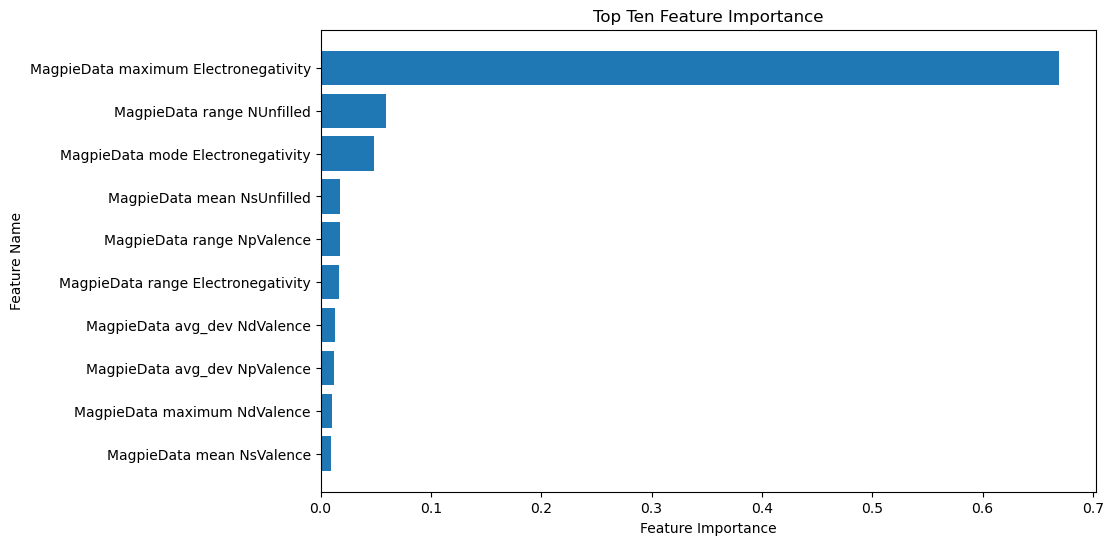

In [122]:
# Get feature importances
importances = model.feature_importances_

# Get feature names (assuming your feature names are stored in a list)
feature_names = el

# Sort the feature importances and select the top ten
sorted_idx = np.argsort(importances)[::-1]
top_ten_indices = sorted_idx[:10]
top_ten_importances = importances[top_ten_indices]
top_ten_feature_names = [feature_names[i] for i in top_ten_indices]

# Create a bar graph for feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_ten_feature_names, top_ten_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top Ten Feature Importance")
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.savefig("Images/el_Xgboost_feat.png")  # Save the plot to a file
plt.show()